In [21]:
import requests
import pandas as pd
from bs4 import BeautifulSoup 

In [22]:
url = "https://www.melon.com/chart/index.htm"

In [23]:
headers = {
    "User-Agent":"Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/114.0.0.0 Safari/537.36"
}

In [24]:
res = requests.get(url, headers=headers)
res

<Response [200]>

In [25]:
html = res.text
print(repr(html[:100]))
soup = BeautifulSoup(html, "html.parser")

'<!DOCTYPE html>\r\n<html lang="ko">\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n<head>\r\n\t\t\r\n\t\r\n\t\r\n\t\r\n\t\r\n\t\r\n\t\r\n\t\r\n\t\r\n\r\n\t'


In [26]:
soup.select(".service_list_song tbody tr")

wrap_tag_list = soup.select(".lst50 .lst100")

wrap_tag_list = soup.select("tr[data-song-no]")
len(wrap_tag_list)

100

In [27]:

wrap_tag = wrap_tag_list[0]

song_list = []
for wrap_tag in wrap_tag_list:
  song_no = wrap_tag["data-song-no"]


  #wrap_tag.select_one("[href*=playSong]").text
  song_title = wrap_tag.select_one("[href*=playSong]").text  # "playSong" in href 의 의미
  artist_name = wrap_tag.select_one("[href*=goArtistDetail]").text
  album_name = wrap_tag.select_one("[href*=goAlbumDetail]")["title"]

  cover_image_url = wrap_tag.select_one("[onerror*=defaultAlbumImg]")["src"]
  #.jpg 뒤에 개발자들끼리 최적화를 위한 특정 룰을설계해놓은 것.

  (song_title, artist_name, album_name, cover_image_url)

  song_list.append({
      "곡일련번호":song_no,
      "앨범명":album_name,
      "곡명":song_title,
      "커버이미지_주소":cover_image_url
  })
  

  len(song_list)
# href에 :(세미콜론) 이 있으면 자바스크립트 신호이다. 
# *=는 포함되는 것만 찾겠다는 기호이다. playSong in href
# ^=는 문자열의 start_with 와 같은 의미라고한다..
# $=는 href.endswith("platSong") 과 같은 의미라고 한다

#df = pd.DataFrame(song_list).set_index("곡일련번호")
#df["순위"] = range(1, df.shape[0]+1])
#print(df.shape)




In [28]:
song_list = []

for wrap_tag in wrap_tag_list:
    song_no = wrap_tag["data-song-no"]

    # wrap_tag.select_one("[href^=playSong]")  # href.startswith("playSong")의 의미
    # wrap_tag.select_one("[href$=playSong]")  # href.endswith("playSong")의 의미
    song_title = wrap_tag.select_one("[href*=playSong]").text  # "playSong" in href 의 의미
    artist_name = wrap_tag.select_one("[href*=goArtistDetail]").text
    album_name = wrap_tag.select_one("[href*=goAlbumDetail]")["title"]
    
    cover_image_url = wrap_tag.select_one("[onerror*=defaultAlbumImg]")["src"]

    song_list.append({
        
        
        "곡일련번호":song_no,
        "앨범명":album_name,
        "곡명":song_title,
        "가수명":artist_name
        "커버이미지주소":cover_image_url
    })
        
                
    
    # print(song_no, album_name, song_title, artist_name, cover_image_url)

len(song_list)



df = pd.DataFrame(song_list).set_index("곡일련번호")
df["순위"] = range(1, df.shape[0]+1)
print(df.shape)
df.head()

SyntaxError: invalid syntax (2522904660.py, line 21)

In [ ]:
url = "https://www.melon.com/commonlike/getSongLike.json"
params = {
    "contsIds": "36599950,36617841"
}

res = requests.get(url, params=params, headers=headers)
res

<Response [200]>

In [ ]:
# dict comprehension


for song in res.json()['contsLike']:
  str(song["CONTSID"]): int(song["SUMMCNT"])
    for song in res.json["contsLike"]
???????
    

    






SyntaxError: incomplete input (737323294.py, line 11)

In [1]:
numbers = [1, 2, 3, 4, 5]

[number ** 2 for number in numbers] # list comprehension
[number ** 2 
 for number in numbers 
 if number % 2 == 0 ] #list comprehension

[4, 16]

In [2]:
{ number ** 3 for number in numbers } # set comprehension

{1, 8, 27, 64, 125}

In [3]:
{ number: number % 3 for number in numbers} # dict comprehension

#앞에 항목에서 콜론으로써 키와 밸류를 구별하느냐가 딕,집합의 차이

{1: 1, 2: 2, 3: 0, 4: 1, 5: 2}

In [4]:
(number ** 2 for number in numbers) # tuple comprehension은 없다!

<generator object <genexpr> at 0x0000018D07B77B90>

# 좋아요 요청

In [ ]:
df

NameError: name 'df' is not defined

In [13]:
# conts_ids = ",".join(df.index) #,를 구분자로해서 각각을 ~


conts_ids = "36599950,36617841"

In [16]:
import requests

url = "https://www.melon.com/commonlike/getSongLike.json"
params = {
    "contsIds": conts_ids,
}

headers = {
  "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/114.0.0.0 Safari/537.36"
}

res = requests.get(url, params=params, headers=headers)
res

<Response [200]>

In [17]:
res.json()

{'contsLike': [{'CONTSID': 36599950, 'LIKEYN': 'N', 'SUMMCNT': 103331},
  {'CONTSID': 36617841, 'LIKEYN': 'N', 'SUMMCNT': 107627}],
 'httpDomain': 'http://www.melon.com',
 'httpsDomain': 'https://www.melon.com',
 'staticDomain': 'https://static.melon.co.kr'}

In [19]:
#dict comprehension

likes_dict = {
    str(song["CONTSID"]): int(song["SUMMCNT"])
    for song in res.json()["contsLike"]
}
likes_dict

{'36599950': 103331, '36617841': 107627}

In [ ]:
song_list = []

for wrap_tag in wrap_tag_list:
    song_no = wrap_tag["data-song-no"]

    # wrap_tag.select_one("[href^=playSong]")  # href.startswith("playSong")의 의미
    # wrap_tag.select_one("[href$=playSong]")  # href.endswith("playSong")의 의미
    song_title = wrap_tag.select_one("[href*=playSong]").text  # "playSong" in href 의 의미
    artist_name = wrap_tag.select_one("[href*=goArtistDetail]").text
    album_name = wrap_tag.select_one("[href*=goAlbumDetail]")["title"]
    
    cover_image_url = wrap_tag.select_one("[onerror*=defaultAlbumImg]")["src"]

    song_list.append({
        "곡일련번호": song_no,
        "앨범명": album_name,
        "곡명": song_title,
        "가수명": artist_name,
        "커버이미지_주소": cover_image_url,
    })
    
    # print(song_no, album_name, song_title, artist_name, cover_image_url)

df = pd.DataFrame(song_list).set_index("곡일련번호")
df["순위"] = range(1, df.shape[0]+1)
print(df.shape)
df.head()

(100, 5)


,앨범명,곡명,가수명,커버이미지_주소,순위
곡일련번호,,,,,
36599950,NewJeans 2nd EP 'Get Up',Super Shy,NewJeans,https://cdnimg.melon.co.kr/cm2/album/images/11...,1
36617841,Seven (feat. Latto) - Clean Ver.,Seven (feat. Latto) - Clean Ver.,정국,https://cdnimg.melon.co.kr/cm2/album/images/11...,2
36635522,NewJeans 2nd EP 'Get Up',ETA,NewJeans,https://cdnimg.melon.co.kr/cm2/album/images/11...,3
36430773,I feel,퀸카 (Queencard),(여자)아이들,https://cdnimg.melon.co.kr/cm2/album/images/11...,4
36382580,1집 Alone,헤어지자 말해요,박재정,https://cdnimg.melon.co.kr/cm2/album/images/11...,5


In [29]:
# 엑셀에서 열어볼 것이다. => utf-8-sig
# ELSE => utf8

df.to_csv("melon_top100-utf-8-sig.csv", encoding="utf-8-sig") #utf8, utf-8-sig

In [ ]:
type(list(likes_dict.keys()[0])

SyntaxError: incomplete input (20579387.py, line 1)

In [ ]:
import matplotlib.pyplot as plt
import platform

#데이터 시각화 맛 보기

In [ ]:
song_count_series = df.groupby('가수명').size().sort_values(ascending=False)
song_count_series.plot()

In [ ]:
mask = song_count_series > 1 # boolean mask?
chart_series = song_count_series[mask]

In [ ]:
mask = song_count_series == 1
song_count_series[mask]

가수명
이무진                     1
#안녕                     1
윤하 (YOUNHA)             1
우디 (Woody)              1
오마이걸 (OH MY GIRL)       1
세븐틴 (SEVENTEEN)         1
성시경                     1
이채연                     1
제이세라                    1
임재현                     1
임한별                     1
지민                      1
지수 (JISOO)              1
지아                      1
케이시 (Kassy)             1
탑현                      1
테이                      1
부석순 (SEVENTEEN)         1
던 (DAWN)                1
박재정                     1
The Kid LAROI           1
Agust D                 1
DK(디셈버)                 1
EXO                     1
FIFTY FIFTY             1
H1-KEY (하이키)            1
Lauv                    1
Paul Blanco             1
STAYC(스테이씨)             1
ZEROBASEONE (제로베이스원)    1
멜로망스                    1
aespa                   1
imase                   1
j-hope                  1
경서                      1
경서예지                    1
김민석 (멜로망스)              1
김호중                     1
로이킴     

<Axes: >

C:\Users\김민제\AppData\Roaming\Python\Python311\site-packages\IPython\core\events.py:93: UserWarning: Glyph 51076 (\N{HANGUL SYLLABLE IM}) missing from current font.
  func(*args, **kwargs)
C:\Users\김민제\AppData\Roaming\Python\Python311\site-packages\IPython\core\events.py:93: UserWarning: Glyph 50689 (\N{HANGUL SYLLABLE YEONG}) missing from current font.
  func(*args, **kwargs)
C:\Users\김민제\AppData\Roaming\Python\Python311\site-packages\IPython\core\events.py:93: UserWarning: Glyph 50885 (\N{HANGUL SYLLABLE UNG}) missing from current font.
  func(*args, **kwargs)
C:\Users\김민제\AppData\Roaming\Python\Python311\site-packages\IPython\core\events.py:93: UserWarning: Glyph 48169 (\N{HANGUL SYLLABLE BANG}) missing from current font.
  func(*args, **kwargs)
C:\Users\김민제\AppData\Roaming\Python\Python311\site-packages\IPython\core\events.py:93: UserWarning: Glyph 53444 (\N{HANGUL SYLLABLE TAN}) missing from current font.
  func(*args, **kwargs)
C:\Users\김민제\AppData\Roaming\Python\Python311\site-pa

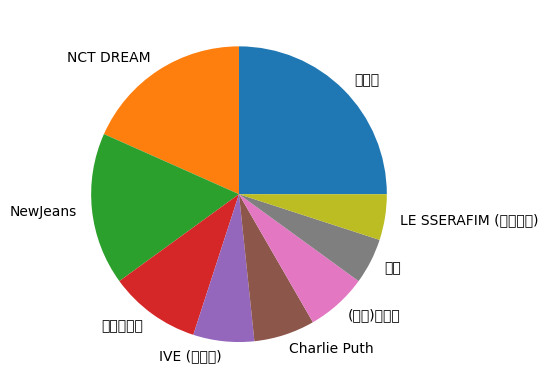

In [ ]:
chart_series.plot(kind="pie")

In [ ]:
import plotly.graph_objects as go

data = {'Name': ['Alice', 'Bob', 'Charlie', 'David', 'Emily'],
        'Age': [25, 30, 35, 40, 10]}

# Create a bar plot
fig = go.Figure(data=[go.Bar(x=data['Name'], y=data['Age'])])

# Update layout
fig.update_layout(title='People Ages', xaxis_title='Name', yaxis_title='Age', height=350)

# Show the Plotly plot
fig.show()

In [ ]:
import plotly.graph_objects as go

data = {'Name': ['Alice', 'Bob', 'Charlie', 'David', 'Emily'],
        'Age': [25, 30, 35, 40, 10]}

# 2개 이상의 차트도 손쉽게 생성
bar1 = go.Bar(x=data['Name'], y=data['Age'], name="차트1")
bar2 = go.Bar(x=data['Name'], y=data['Age'], name="차트2")

layout = go.Layout(
    title="People Ages",
    xaxis_title="Name",
    yaxis_title="Age",
    height=350,
)

fig = go.Figure(data=[bar1, bar2], layout=layout)

# Show the Plotly plot
fig.show()


In [ ]:
# python -m pip install plotly

import plotly.express as px

# 샘플 데이터 생성 (도시 이름, 위도, 경도)
data = {
    'City': ['서울', '뉴욕', '도쿄', '런던', '파리'],
    'Latitude': [37.5665, 40.7128, 35.682839, 51.5074, 48.8566],
    'Longitude': [126.9780, -74.0060, 139.759455, -0.1278, 2.3522]
}

# Plotly Express를 사용하여 지도 시각화
fig = px.scatter_geo(
    data,
    lat='Latitude',
    lon='Longitude',
    hover_name='City',
)

# 지도 스타일 설정 (선택사항)
fig.update_geos(projection_type='natural earth')

# 인터랙티브 지도 출력
fig.show()

In [ ]:
# python -m pip install plotly

import plotly.express as px

# 국가별로 연도별로 다양한 지표들을 포함하는 데이터셋
#  - country: 국가 이름
#  - continent: 국가 대륙
#  - year: 연도
#  - lifeExp: 기대 수명 (Life Expectancy)
#  - pop: 인구 수 (Population)
#  - gdpPercap: 개인당 GDP (GDP per Capita)
#  - iso_alpha: 국가 ISO 코드 (3자리)
#  - iso_num: 국가 ISO 코드 (숫자)

df = px.data.gapminder().query("year == 2007")

fig = px.scatter_geo(
    df,
    locations="iso_alpha",
    size="pop", # size of markers, "pop" is one of the columns of gapminder
)
fig.show()

In [ ]:
figure, axes_tuple = plt.subplots(
                nrows=2,
                ncols=2

)

x = [0, 1, 2, 3]
y= [1, 4, 9, 16]

axes

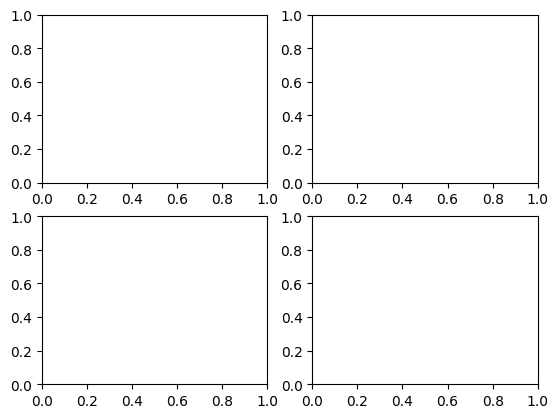

In [ ]:


figure, axes_tuple = plt.subplots(
    nrows=2,
    ncols=2
)

x = [0, 1, 2, 3]
y = [1, 4, 9, 16]

#axes_tuple[0][0].plot(x, y)
#axes_tuple[0][0].set_title("X & Y")
#axes_tuple[0][0].set_xlabel("X Value")
#axes_tuple[0][0].set_ylabel("Y Value")

In [ ]:
x, y = 1, 2,  #좌항과 우항의 개수가 같아야한다. 각각의 순서에 맞춰서 대입한다

#x = 1
#y = 2
x, y = y, x

In [ ]:
matrix = [[1, 2],[3, 4]] 
a = matrix[0][0]
b = matrix[0][1]
c = matrix[1][0]
d = matrix[1][1]

[[a, b], [c, d]] = matrix

Text(0, 0.5, 'Y Value')

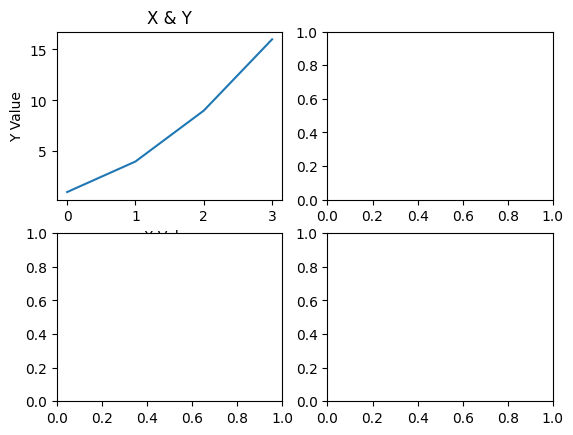

In [ ]:
figure, [[ax1, ax2], [ax3, ax4]] = plt.subplots(
    nrows=2,
    ncols=2
)

x = [0, 1, 2, 3]
y = [1, 4, 9, 16]

ax1.plot(x, y)
ax1.set_title("X & Y")
ax1.set_xlabel("X Value")
ax1.set_ylabel("Y Value")

In [ ]:
import pandas as pd
import seaborn as sns

data_url = "https://pyhub-kr.github.io/samples/abc-bootcamp-2023-crawl/data/sample-melon.xlsx"

df = pd.read_excel(data_url)
df = df.set_index('곡일련번호')


# 내림차순 정렬하고, 가수명만 추출
desc_order = df['가수'].value_counts(sort=True, ascending=False).index

axes = sns.countplot(data=df, x='가수', order=desc_order)

ImportError: Missing optional dependency 'openpyxl'.  Use pip or conda to install openpyxl.

In [ ]:
import matplotlib.pyplot as plt
import platform

if platform.system() == "Darwin":
    plt.rc("font", family="AppleGothic")  # macOS 시스템 기본 폰트

elif platform.system() == "Windows":
    plt.rc("font", family="Malgun Gothic")  # Windows 시스템 기본 폰트

In [6]:
numbers = [1, 2, 3, 4, 5]

new_list = []
for number in numbers:
  new_list.append(number ** 2)
new_list

[1, 4, 9, 16, 25]

In [7]:
[number ** 2 for number in numbers]

[1, 4, 9, 16, 25]

In [8]:
{number ** 2 for number in numbers}

{1, 4, 9, 16, 25}

In [9]:
{number: number ** 2 for number in numbers}

{1: 1, 2: 4, 3: 9, 4: 16, 5: 25}